<a href="https://colab.research.google.com/github/divyadarshini11/Image-Processing/blob/main/Light_weight_CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Light-weight CNN Architecture

1. **Encoder:**

*   *Conv2D layers:* Apply convolutional filters to extract features from the input image.
*   64 filters with a 3x3 kernel size are used repeatedly.
*   padding='same' maintains spatial dimensions after convolution.
*   *BatchNormalization:* Normalizes the activations of the previous layer, improving training stability and convergence.
*   *Activation('relu'):* Applies the ReLU (Rectified Linear Unit) activation function, introducing non-linearity.
*   *MaxPooling2D:* Downsamples the feature maps by taking the maximum value within 2x2 windows, reducing spatial dimensions and computational cost.

2. **Decoder:**

*   *Conv2DTranspose layers:* Upsample the feature maps, attempting to reconstruct the original image's spatial dimensions.
*   128 filters with a 3x3 kernel size are used initially.
*   *UpSampling2D:* Further increases spatial dimensions by duplicating pixels.
*   *Additional Conv2D layers:* Process the upsampled features to refine the output.

3. **Output Layer:** Conv2D(1, (3, 3), activation='sigmoid', padding='same'): Produces a single-channel output with values between 0 and 1 (using a sigmoid activation), used for pixel-wise prediction task.

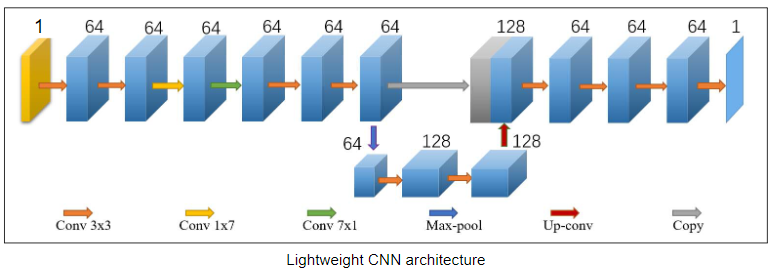

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define Leight-weight CNN architecture
model = models.Sequential()

# Encoder
# Block 1
model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(128, 128, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Block 2
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Block 3
model.add(layers.Conv2D(64, (1, 7), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Block 4
model.add(layers.Conv2D(64, (7, 1), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Block 5
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Block 6
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))


# Max-pooling
model.add(layers.MaxPooling2D((2, 2), padding='same'))


# Decoder
# Block 7
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Block 8
model.add(layers.Conv2D(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Block 9 - Up-convolution
model.add(layers.Conv2DTranspose(128, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.UpSampling2D((2, 2)))

# Block 10
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Block 11
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Block 12
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Output Layer
model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

# Display the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 batch_normalization_12 (Ba  (None, 128, 128, 64)      256       
 tchNormalization)                                               
                                                                 
 activation_12 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_13 (Ba  (None, 128, 128, 64)      256       
 tchNormalization)                                               
                                                                 
 activation_13 (Activation)  (None, 128, 128, 64)     

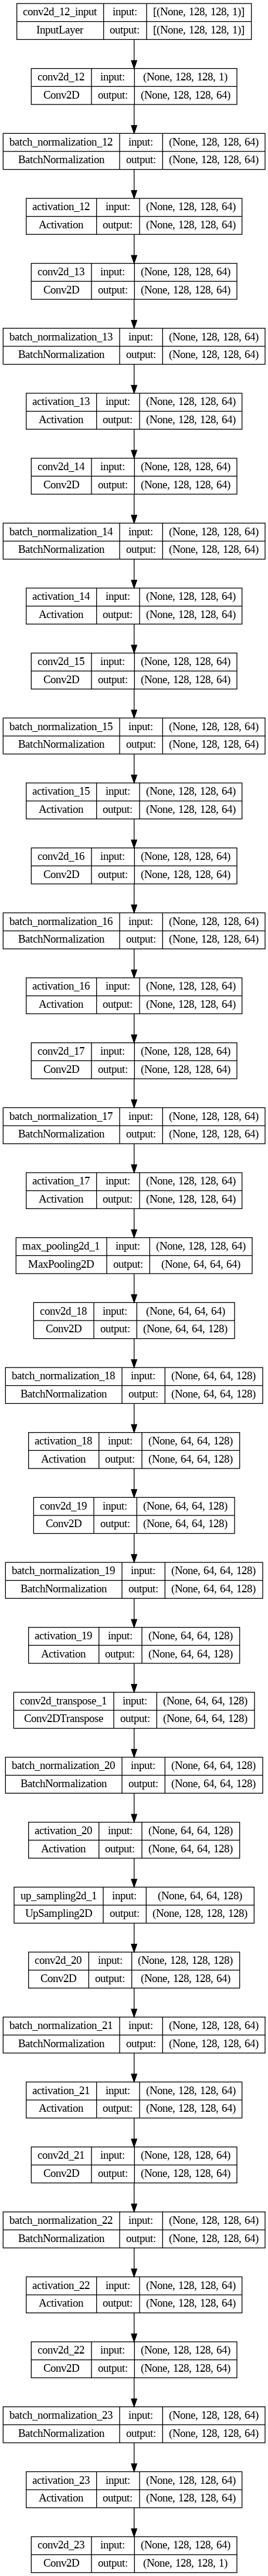

In [4]:
import matplotlib.pyplot as plt
# Save model summary as an image
tf.keras.utils.plot_model(
    model,
    to_file='model_summary.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96  # Adjust the dpi as needed
)